In [4]:
import matplotlib.pyplot as plt
from NNModel import NNModel
from Citra import Citra
import cv2 as cv
import os
import numpy as np

In [5]:
def getTrainingData(path, label):
    trainImages = []

    for file in os.listdir(path):
        if file.endswith('.png') == False:
            continue
            
        filePath = os.path.join(path, file)
        img = cv.imread(filePath)
        img = cv.resize(img, (128, 128))
        trainImages.append([img, label])
        
    return np.array(trainImages)

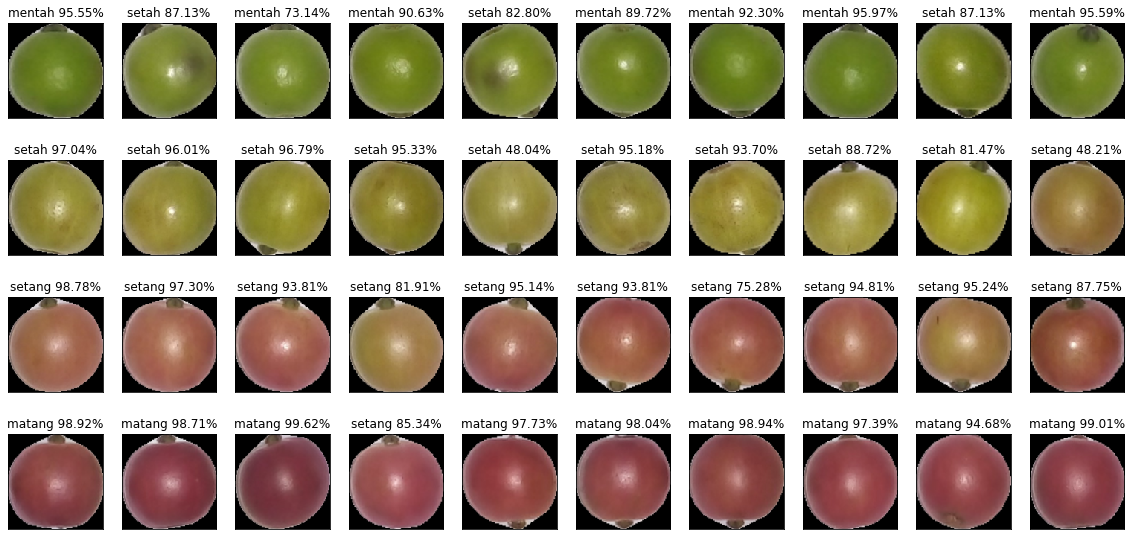

In [8]:
# testing untuk data testing

pathModel = 'hasil learning/Model NN 4376 93.4375.h5'
k1 = np.array([i[0] for i in getTrainingData('data/Dataset/v2/testing/1', None)])
k2 = np.array([i[0] for i in getTrainingData('data/Dataset/v2/testing/2', None)])
k3 = np.array([i[0] for i in getTrainingData('data/Dataset/v2/testing/3', None)])
k4 = np.array([i[0] for i in getTrainingData('data/Dataset/v2/testing/4', None)])
test_data = np.concatenate((k1, k2, k3, k4), axis = 0)
fig = plt.figure(figsize = (20, 50))
model = NNModel(pathModel, 'categorical_crossentropy', 'sgd')
model.outputClass = ['mentah', 'setah', 'setang', 'matang']

for counter, item in enumerate(test_data):
    y = fig.add_subplot(20, 10, counter + 1)
    output = model.predict(test_data[counter])
    
    y.imshow(cv.cvtColor(test_data[counter], cv.COLOR_BGR2RGB))
    plt.title(output)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)